# Rancang Bangun Pengendali Otomatis Lingkungan Termal Berbasis Jaringan Saraf Tiruan

### Program Kecerdasan Buatan untuk membentuk model jaringan saraf tiruan dalam memenuhi Tugas Akhir program studi Teknik Fisika.
### Data di Bulan Maret 2019

In [1]:
# Mengimpor pustaka yang dibutuhkan.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Memasukkan dataset ke dalam jupyter.
dataMar = pd.read_excel('dataDES.xlsx')

In [3]:
# Menampilkan 5 data teratas.
dataMar.head(5)

,No,Time,Heater,AC,DrybulbT,Radiation,AirT,RH,DT
0,1,00:03:00,0,0,24.19,0.0,23.44,71.76,DT4
1,2,00:09:00,0,0,24.19,0.0,23.45,71.81,NaN
2,3,00:15:00,0,0,24.19,0.0,23.46,71.85,NaN
3,4,00:21:00,0,0,24.19,0.0,23.47,71.90,NaN
4,5,00:27:00,0,0,24.19,0.0,23.49,71.95,NaN


In [4]:
# Menampilkan 5 data terbawah.
dataMar.tail(5)

,No,Time,Heater,AC,DrybulbT,Radiation,AirT,RH,DT
5995,5996,23:33:00,2,0,24.22,0.0,24.89,99.69,NaN
5996,5997,23:39:00,2,0,24.22,0.0,24.87,99.69,NaN
5997,5998,23:45:00,2,0,24.22,0.0,24.86,99.69,NaN
5998,5999,23:51:00,2,0,24.22,0.0,24.85,99.69,NaN
5999,6000,23:57:00,2,0,24.22,0.0,24.83,99.69,NaN


In [5]:
# Membuang fitur No, Time dan DT.
dataMar = dataMar.drop(['No','Time','DT'], axis =1)

In [6]:
# Menampilkan ukuran matriks.
dataMar.shape

(6000, 6)

In [7]:
# Memeriksa persebaran statistik data.
dataMar.describe()

,Heater,AC,DrybulbT,Radiation,AirT,RH
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.600000,9.375000,24.397500,185.368833,24.088415,95.417147
std,0.800067,12.379819,0.492875,259.164549,2.215199,7.212128
min,0.000000,0.000000,23.420000,0.000000,16.000000,71.760000
25%,0.000000,0.000000,24.172500,0.000000,23.830000,93.320000
50%,0.000000,0.000000,24.270000,16.000000,24.390000,99.675000
75%,1.000000,24.000000,24.795000,306.812750,25.160000,99.990000
max,2.000000,30.000000,25.290000,800.281000,30.000000,100.000000


In [8]:
# Memeriksa nilai yang kosong.
dataMar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
Heater       6000 non-null int64
AC           6000 non-null int64
DrybulbT     6000 non-null float64
Radiation    6000 non-null float64
AirT         6000 non-null float64
RH           6000 non-null float64
dtypes: float64(4), int64(2)
memory usage: 281.4 KB


In [9]:
# Memisahkan data input dan data target.

# Data Input
X = dataMar[['Heater','AC','DrybulbT','Radiation']]
# Data Target
Y = dataMar[['AirT','RH']]

In [10]:
X.head()

,Heater,AC,DrybulbT,Radiation
0,0,0,24.19,0.0
1,0,0,24.19,0.0
2,0,0,24.19,0.0
3,0,0,24.19,0.0
4,0,0,24.19,0.0


In [11]:
Y.head()

,AirT,RH
0,23.44,71.76
1,23.45,71.81
2,23.46,71.85
3,23.47,71.90
4,23.49,71.95


In [12]:
# Memisahkan data pelatihan (training) dan data pengujian (testing).

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=(1/3), random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4000, 4) (2000, 4) (4000, 2) (2000, 2)


In [13]:
# Validasi data telah teracak
X_train.head()

,Heater,AC,DrybulbT,Radiation
3586,0,0,24.32,0.000
3772,1,0,24.45,247.246
1277,0,0,24.21,99.221
3935,1,27,24.93,352.523
872,0,19,24.76,360.338


In [14]:
# Variabel untuk pembuatan grafik

Heater    = X_test['Heater']
AC        = X_test['AC']
DrybulbT  = X_test['DrybulbT']
Radiation = X_test['Radiation']

AirT      = Y_test['AirT']
RH        = Y_test['RH']

## Regresi Linier

In [15]:
from sklearn.linear_model import Ridge

model_linear = Ridge()
model_linear.fit(X_train, Y_train)

Y_guess = model_linear.predict(X_test)

mean_squared_error(Y_test, Y_guess), r2_score(Y_test, Y_guess)

(26.11863052996816, 0.12805573449259683)

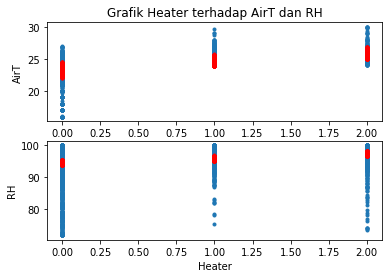

In [16]:
plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap AirT dan RH')
plt.plot(X_test.values[:,0], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,0], Y_guess[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,0], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,0], Y_guess[:,1], 'r.')
plt.xlabel('Heater')
plt.ylabel('RH')

plt.show()

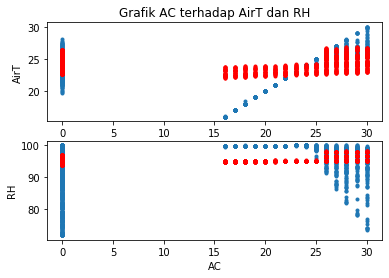

In [17]:
plt.subplot(2, 1, 1)
plt.title('Grafik AC terhadap AirT dan RH')
plt.plot(X_test.values[:,1], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,1], Y_guess[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,1], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,1], Y_guess[:,1], 'r.')
plt.xlabel('AC')
plt.ylabel('RH')

plt.show()

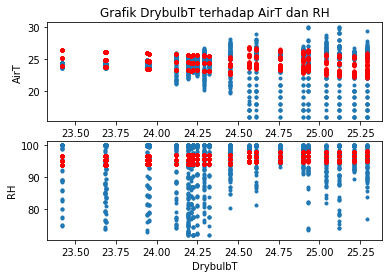

In [18]:
plt.subplot(2, 1, 1)
plt.title('Grafik DrybulbT terhadap AirT dan RH')
plt.plot(X_test.values[:,2], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,2], Y_guess[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,2], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,2], Y_guess[:,1], 'r.')
plt.xlabel('DrybulbT')
plt.ylabel('RH')

plt.show()

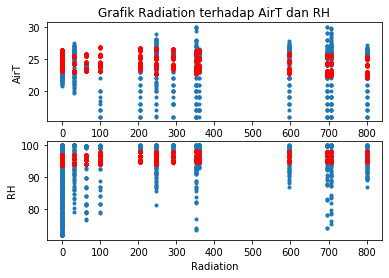

In [19]:
plt.subplot(2, 1, 1)
plt.title('Grafik Radiation terhadap AirT dan RH')
plt.plot(X_test.values[:,3], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,3], Y_guess[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,3], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,3], Y_guess[:,1], 'r.')
plt.xlabel('Radiation')
plt.ylabel('RH')

plt.show()

## Regressi menggunakan Multi-Layer Perceptron

In [20]:
# Impor pustaka
from sklearn.neural_network import MLPRegressor

In [21]:
daftar = [0,1]

In [22]:
max(daftar)

1

In [23]:
# # Mencari optimasi jumlah hidden layer dan neuron terbaik

# def ann(n):
#     return MLPRegressor(random_state=1, activation='relu', hidden_layer_sizes=(14,11,n))

# daftar = [0]
# for i in range(1,31):
#     model = ann(i)
#     model.fit(X_train, Y_train)
#     pred = model.predict(X_test)
#     accuracy = r2_score(Y_test, pred)
#     daftar.append(accuracy)
#     if accuracy >= 50:
#         neuron = i
#         break
#     neuron = daftar.index(max(daftar))
    
# print(neuron)

In [24]:
# Pembuatan model
model_mlp = MLPRegressor(random_state=1, activation='relu', hidden_layer_sizes=(14,11))

In [25]:
# Melakukan pelatihan (training) menggunakan 'fit'
model_mlp.fit(X_train, Y_train)

# Prediksi output
Y_pred = model_mlp.predict(X_test)

# Menampilkan nilai MSE dan R^2
mean_squared_error(Y_test, Y_pred), r2_score(Y_test, Y_pred)

/home/dhan/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(19.322029122462688, 0.5303389785022228)

In [26]:
model_mlp.get_params

<bound method BaseEstimator.get_params of MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(14, 11), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)>

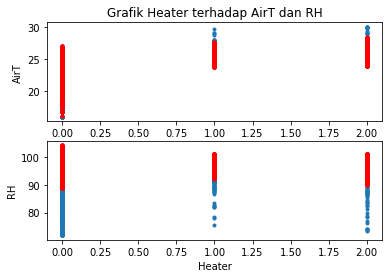

In [27]:
# plot a line, a perfit predict would all fall on this line
plt.subplot(2, 1, 1)
plt.title('Grafik Heater terhadap AirT dan RH')
plt.plot(X_test.values[:,0], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,0], Y_pred[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,0], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,0], Y_pred[:,1], 'r.')
plt.xlabel('Heater')
plt.ylabel('RH')

plt.show()

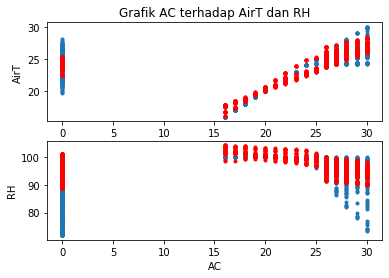

In [28]:
plt.subplot(2, 1, 1)
plt.title('Grafik AC terhadap AirT dan RH')
plt.plot(X_test.values[:,1], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,1], Y_pred[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,1], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,1], Y_pred[:,1], 'r.')
plt.xlabel('AC')
plt.ylabel('RH')

plt.show()

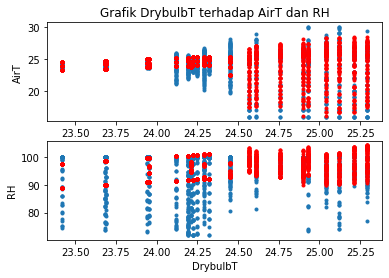

In [29]:
plt.subplot(2, 1, 1)
plt.title('Grafik DrybulbT terhadap AirT dan RH')
plt.plot(X_test.values[:,2], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,2], Y_pred[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,2], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,2], Y_pred[:,1], 'r.')
plt.xlabel('DrybulbT')
plt.ylabel('RH')

plt.show()

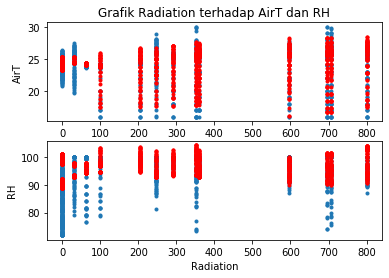

In [30]:
plt.subplot(2, 1, 1)
plt.title('Grafik Radiation terhadap AirT dan RH')
plt.plot(X_test.values[:,3], Y_test.values[:,0], '.')
plt.plot(X_test.values[:,3], Y_pred[:,0], 'r.')
plt.ylabel('AirT')

plt.subplot(2, 1, 2)
plt.plot(X_test.values[:,3], Y_test.values[:,1], '.')
plt.plot(X_test.values[:,3], Y_pred[:,1], 'r.')
plt.xlabel('Radiation')
plt.ylabel('RH')

plt.show()